<a href="https://colab.research.google.com/github/Jpsama1236/ML_algorithms/blob/main/Gradient_with_b_only_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_regression


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [6]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=15,random_state=12)

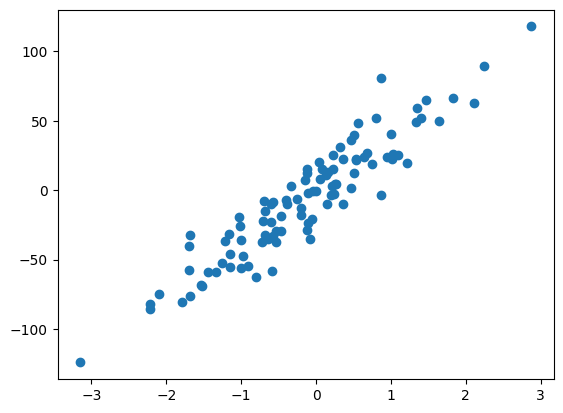

In [7]:

plt.scatter(X,y)


In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

[37.73996474]
-1.158832001951743


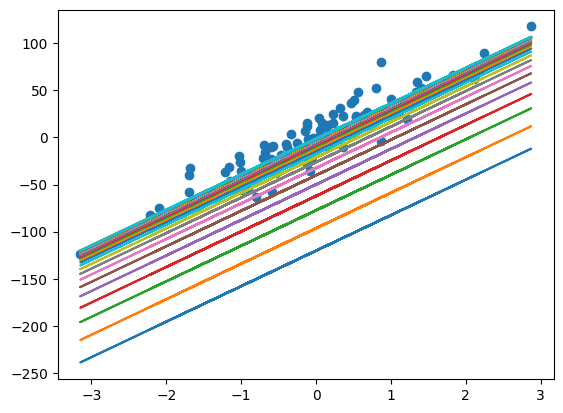

In [14]:
b = -150
m = 37.73
lr = 0.001
all_b = []
all_cost = []

epochs = 30

for i in range(epochs):
    slope = 0
    cost = 0
    slope=-2*np.sum(y-m*X.ravel() -b)
    cost+=np.sum(y-m*X.ravel()-b)**2
    b = b - (lr * slope)
    all_b.append(b)
    all_cost.append(cost)
    y_pred = m * X + b
    plt.plot(X,y_pred)
plt.scatter(X,y)

In [18]:
all_b.shape

(30,)

In [17]:
all_b = np.array(all_b).ravel()
all_b

array([-120.232054  ,  -96.4176972 ,  -77.36621175,  -62.1250234 ,
        -49.93207272,  -40.17771217,  -32.37422374,  -26.13143299,
        -21.13720039,  -17.14181431,  -13.94550544,  -11.38845835,
         -9.34282068,   -7.70631054,   -6.39710243,   -5.34973594,
         -4.51184275,   -3.8415282 ,   -3.30527656,   -2.87627524,
         -2.53307419,   -2.25851335,   -2.03886468,   -1.86314574,
         -1.72257059,   -1.61011047,   -1.52014237,   -1.4481679 ,
         -1.39058831,   -1.34452465])

In [22]:
np.array(all_cost).shape

(30,)

In [23]:
all_cost = np.array(all_cost).ravel()
all_cost

array([2.21532652e+08, 1.41780897e+08, 9.07397744e+07, 5.80734556e+07,
       3.71670116e+07, 2.37868874e+07, 1.52236079e+07, 9.74310909e+06,
       6.23558981e+06, 3.99077748e+06, 2.55409759e+06, 1.63462246e+06,
       1.04615837e+06, 6.69541358e+05, 4.28506469e+05, 2.74244140e+05,
       1.75516250e+05, 1.12330400e+05, 7.18914559e+04, 4.60105318e+04,
       2.94467403e+04, 1.88459138e+04, 1.20613848e+04, 7.71928630e+03,
       4.94034323e+03, 3.16181967e+03, 2.02356459e+03, 1.29508134e+03,
       8.28852055e+02, 5.30465315e+02])

In [38]:
fig, ax = plt.subplots(figsize=(9,5))
#fig.set_tight_layout(True)
%matplotlib notebook
x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m
ax.scatter(X, y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m + all_b[i])
    ax.set_xlabel(label)
    ax.set_title('Regression line vs epochs')
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=epochs, interval=500)

f = r"animation.gif"
writergif = animation.PillowWriter(fps=2)
anim.save(f, writer=writergif)

<IPython.core.display.Javascript object>

In [39]:
fig = plt.figure(figsize=(9,5))
axis = plt.axes(xlim =(0, 31), ylim =(0, 250000000))
num_epochs=np.arange(1,31)
line, = axis.plot([], [], lw = 2)

xdata, ydata = [], []

# animation function
def animate(i):
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i])
    ydata.append(all_cost[i])
    line.set_data(xdata, ydata)
    axis.set_xlabel(label)
    axis.set_title('Cost function vs Epochs')

    return line,

# calling the animation function
anim = animation.FuncAnimation(fig, animate, frames = 30,repeat=False, interval = 500)

f = r"animation1.gif"
writergif = animation.PillowWriter(fps=2)
anim.save(f, writer=writergif)

<IPython.core.display.Javascript object>

In [41]:
fig = plt.figure(figsize=(9,5))
axis = plt.axes(xlim =(0, 31), ylim =(-150, 10))

line, = axis.plot([], [], lw = 2)

xdata, ydata = [], []

# animation function
def animate(i):
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i])
    ydata.append(all_b[i])
    line.set_data(xdata, ydata)
    axis.set_xlabel(label)
    axis.set_title("b value vs epochs")
    return line,

# calling the animation function
anim = animation.FuncAnimation(fig, animate, frames = 30,repeat=False, interval = 500)

f = r"animation2.gif"
writergif = animation.PillowWriter(fps=2)
anim.save(f, writer=writergif)


<IPython.core.display.Javascript object>

In [44]:

fig, ax = plt.subplots()
ax.plot(all_b, all_cost)
x, y = [],[]
sc = ax.scatter(x,y,color='red',marker='+')
plt.xlim(-150,50)
plt.ylim(-10,250000000)

def animate(i):
    label = 'b value per epoch {0}'.format(i + 1)
    x.append(all_b[i])
    y.append(all_cost[i])
    sc.set_offsets(np.c_[x,y])
    ax.set_xlabel(label)
    ax.set_title("b value vs cost function")
ani = animation.FuncAnimation(fig, animate,
                frames=30, interval=500, repeat=True)
plt.show()

f = r"animation3.gif"
writergif = animation.PillowWriter(fps=2)
ani.save(f, writer=writergif)


<IPython.core.display.Javascript object>